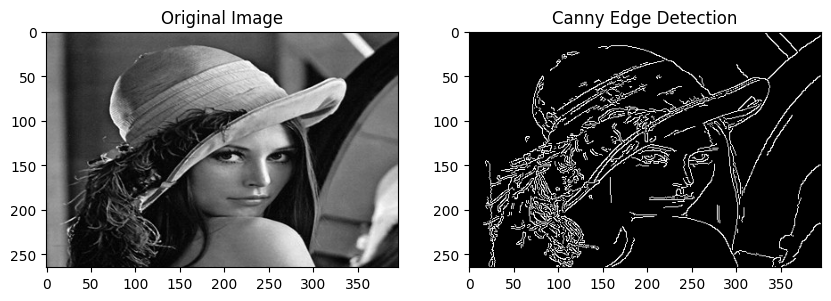

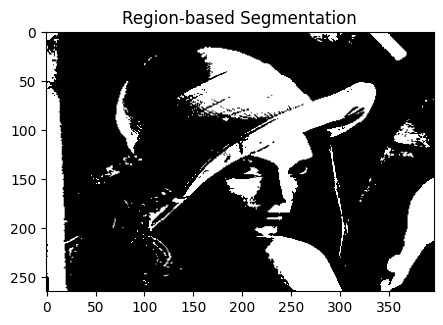

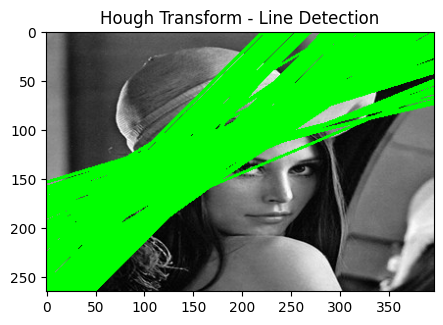

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/Picture1.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()

_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5, 5))
plt.imshow(thresh, cmap="gray")
plt.title("Region-based Segmentation")
plt.show()

edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

hough_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(hough_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(5, 5))
plt.imshow(hough_image)
plt.title("Hough Transform - Line Detection")
plt.show()



image 1/1 /content/Picture1.jpg: 448x640 1 person, 1 umbrella, 441.3ms
Speed: 26.1ms preprocess, 441.3ms inference, 41.8ms postprocess per image at shape (1, 3, 448, 640)


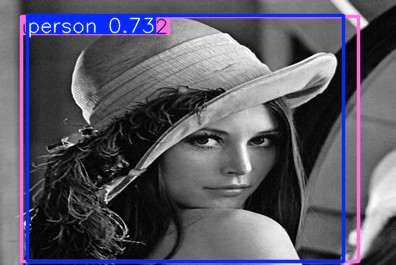

In [5]:
import torch
from PIL import Image
from torchvision import transforms
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

image_path = "/content/Picture1.jpg"
results = model(image_path)

for result in results:
    result.show()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 142MB/s]


100%|██████████| 169M/169M [00:05<00:00, 28.9MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data


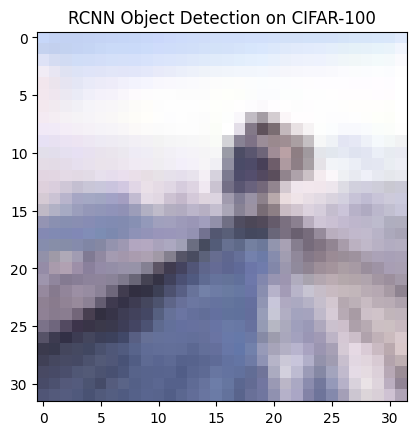

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt
import numpy as np

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

transform = transforms.Compose([transforms.ToTensor()])
cifar100 = torchvision.datasets.CIFAR100(root="./data", train=False, download=True, transform=transform)
image, label = cifar100[0]

with torch.no_grad():
    prediction = model([image])

plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
plt.title("RCNN Object Detection on CIFAR-100")
plt.show()